In [3]:
import pandas as pd

# Sample book data (inline dataset)
data = {
    'Title': [
        'A Light in the Attic', 'Tipping the Velvet', 'Soumission',
        'Sharp Objects', 'Sapiens', 'The Requiem Red',
        'The Dirty Little Secrets Club', 'The Long Haul', 'The Book Thief', 'The Hobbit'
    ],
    'Price': [51.77, 53.74, 50.10, 47.82, 34.23, 22.65, 15.00, 19.99, 43.23, 25.99],
    'Availability': [
        'In stock', 'In stock', 'In stock', 'In stock', 'In stock',
        'Out of stock', 'In stock', 'In stock', 'Out of stock', 'In stock'
    ],
    'Rating': ['Three', 'One', 'One', 'Four', 'Five', 'Two', 'One', 'Three', 'Five', 'Four']
}

# Create DataFrame
df = pd.DataFrame(data)

# Clean and preprocess
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating'] = df['Rating'].map(rating_map)


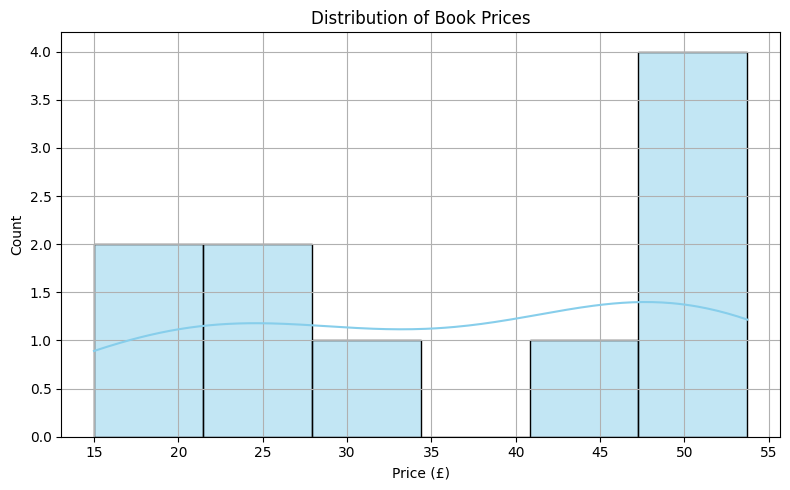

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=6, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3766532097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='pastel')


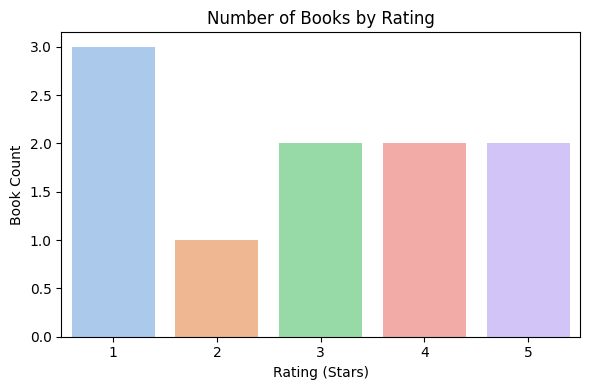

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df, palette='pastel')
plt.title('Number of Books by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Book Count')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2731365679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Price', data=df, palette='coolwarm')


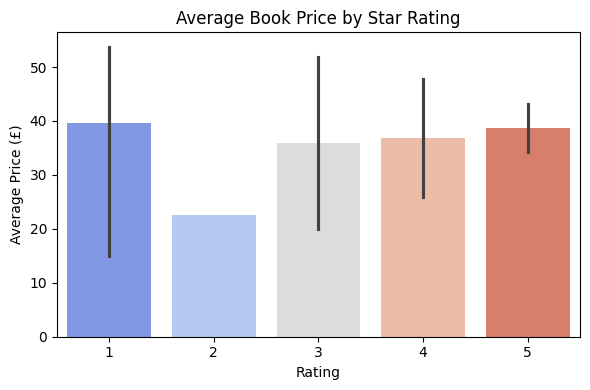

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x='Rating', y='Price', data=df, palette='coolwarm')
plt.title('Average Book Price by Star Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price (£)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4269344133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Availability', data=df, palette='Set2')


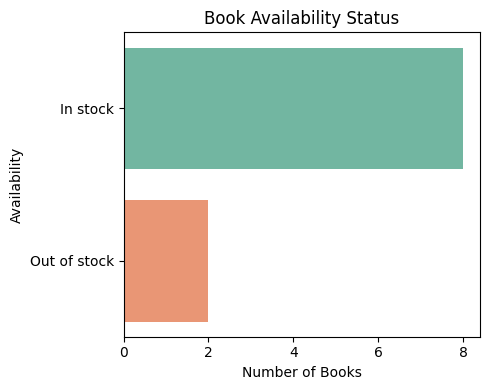

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(y='Availability', data=df, palette='Set2')
plt.title('Book Availability Status')
plt.xlabel('Number of Books')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Sample review dataset
data = {
    'Review': [
        "This product is amazing! I love it.",
        "Terrible experience, I want a refund.",
        "It's okay, not bad but not great either.",
        "Absolutely fantastic quality and service!",
        "Worst purchase ever. Completely useless.",
        "Meh... it's average.",
        "Exceeded my expectations!",
        "Not worth the money at all.",
        "Very satisfied with the product.",
        "I don’t like it, but it’s not terrible."
    ]
}

df = pd.DataFrame(data)



In [10]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function
df['Sentiment'] = df['Review'].apply(get_sentiment)
df


,Review,Sentiment
0,This product is amazing! I love it.,Positive
1,"Terrible experience, I want a refund.",Negative
2,"It's okay, not bad but not great either.",Positive
3,Absolutely fantastic quality and service!,Positive
4,Worst purchase ever. Completely useless.,Negative
5,Meh... it's average.,Negative
6,Exceeded my expectations!,Neutral
7,Not worth the money at all.,Negative
8,Very satisfied with the product.,Positive
9,"I don’t like it, but it’s not terrible.",Positive


/tmp/ipython-input-2263049618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


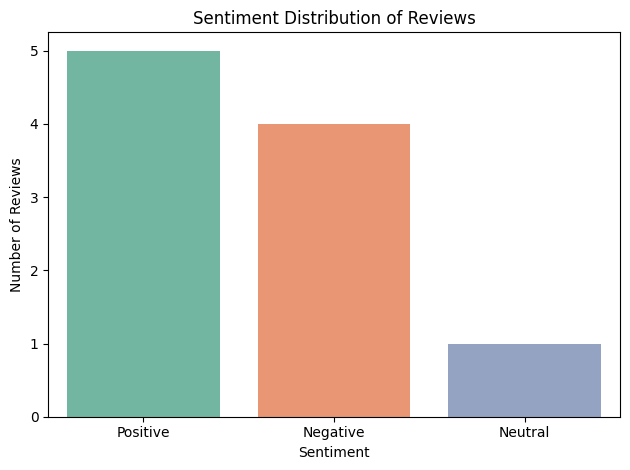

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [15]:
from nrclex import NRCLex

# Detect dominant emotion
def detect_emotion(text):
    emotions = NRCLex(text).raw_emotion_scores
    return max(emotions, key=emotions.get) if emotions else 'None'

df['Dominant Emotion'] = df['Review'].apply(detect_emotion)
df[['Review', 'Sentiment', 'Dominant Emotion']]



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.
